/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Begin init data loader
Batch Size: 6.0 MiB
Data Size: 292.96875 GiB
Data Loader init time: 1.396812 s
Begin init fetcher
Fetcher init time: 1.467879 s
Begin init data loader
Batch Size: 6.0 MiB
Data Size: 58.59375 GiB
Data Loader init time: 0.396451 s
Begin init fetcher
Fetcher init time: 0.433157 s
Model: AlexNet CIFAR100 DO
--------------------------------------------------
Num Params: 58087908
Training AlexNet

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   |  Validation Time   |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|        

/home/jaskin/Intro_Deep_Learning/HM2/jlib/classifier.py:235: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.last_pred = torch.tensor(Y_pred_eval)


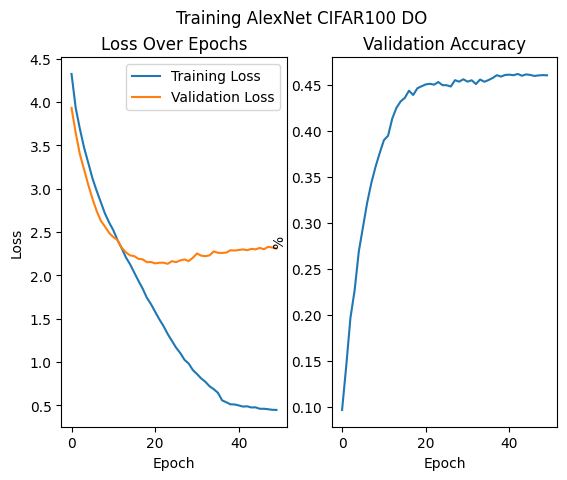

Model: AlexNet CIFAR100 NO DO
--------------------------------------------------
Num Params: 58087908
Training AlexNet

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   |  Validation Time   |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |     38.520613      |      3.974294      |      3.606021      |     -9.266369      |     15.460000      |      0.000000      |      2.659456      |      7.175201      |
--------------------------------------------------------------------------------------------------------------------

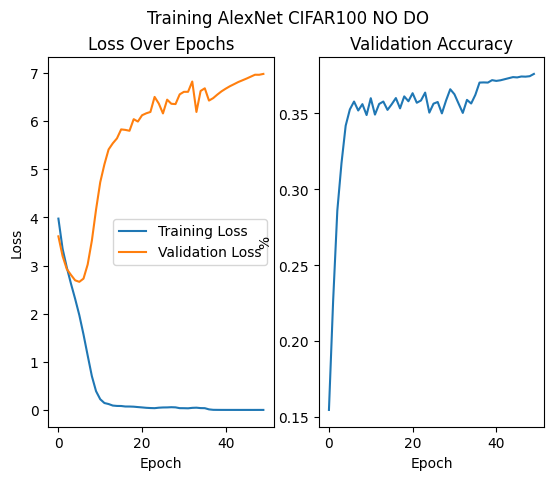

Begin init data loader
Batch Size: 6.0 MiB
Data Size: 292.96875 GiB
Data Loader init time: 0.381573 s
Begin init fetcher
Fetcher init time: 0.461465 s
Begin init data loader
Batch Size: 6.0 MiB
Data Size: 58.59375 GiB
Data Loader init time: 0.344697 s
Begin init fetcher
Fetcher init time: 0.389612 s
Model: AlexNet CIFAR10 DO
--------------------------------------------------
Num Params: 57903498
Training AlexNet

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   |  Validation Time   |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         

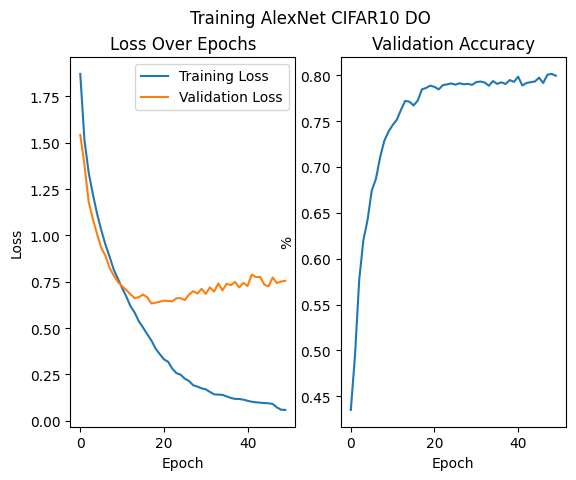

Model: AlexNet CIFAR10 NO DO
--------------------------------------------------
Num Params: 57903498
Training AlexNet

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|       Epoch        |   Epoch Time (s)   |   Training Loss    |     Test Loss      |    Overfit (%)     |    Accuracy (%)    |   Δ Accuracy (%)   |  Validation Time   |  GPU Memory (GiB)  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |     39.425802      |      1.730573      |      1.426837      |     -17.551167     |     49.310000      |      0.000000      |      2.757091      |      9.133173      |
---------------------------------------------------------------------------------------------------------------------

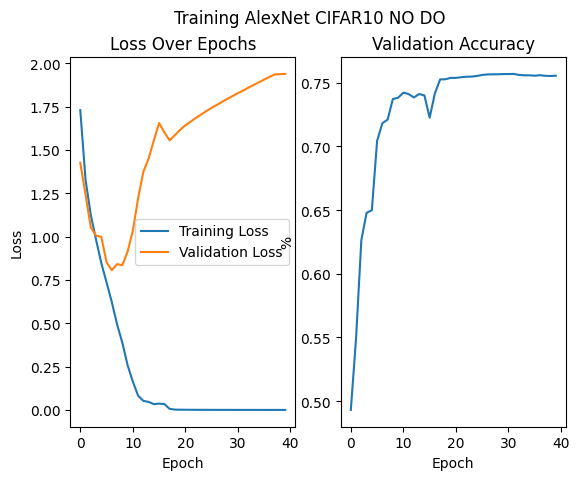

In [1]:
import os
#from helpers import *

from jlib.cifar_preprocessing import get_cifar_loaders, delete_deletables
from jlib.alexnet import AlexNet, ConvParams
import torch
from torch import nn
import matplotlib.pyplot as plt
device = 'cuda'

"""
sudo fuser -v -k /usr/lib/wsl/drivers/nvhm.inf_amd64_5c197d2d97068bef/*
"""
    


cifar_100_train_loader, cifar_100_val_loader = get_cifar_loaders(
    is_cifar10=False,
    train_batch_size=512,
    val_batch_size=512,
    train_workers=6,
    train_cpu_prefetch=10,
    train_gpu_prefetch=10,
    val_workers=2,
    val_cpu_prefetch=2,
    val_gpu_prefetch=2,
)

def train_and_plot(model, train, val, title, min_accuracy=0.65):
    print(f"Model: {title}")
    print("-"*50)
    print(f"Num Params: {sum(p.numel() for p in model.parameters())}")
    model.train_model(
        epochs=50,
        train_loader=train,
        val_loader=val,
        loss_fn=nn.CrossEntropyLoss(),
        optimizer=torch.optim.Adam,
        optimizer_args=[],
        optimizer_kwargs={'lr': 1e-4},
        print_epoch=1,
        header_epoch=10,
        sched_factor=0.1,
        sched_patience=5,
        min_accuracy = 1,
        max_negative_diff_count = 7
    )
    torch.save(model, f'models/{title}.pth')
    model.plot_training(f"Training {title}")
    plt.savefig(f'figures/{title}.png')
    plt.show()

architecture = {
    "in_chan" : 3,
    "in_dim" : (32, 32),
    
    "block_params" : [
        ConvParams(kernel=5, out_chan=128, stride=1, padding='same'),
        ConvParams(kernel=5, out_chan=256, stride=1, padding='same'),
    ],
    "cnv_params" : [
        ConvParams(kernel=3, out_chan=256, stride=1, padding='same'),
        ConvParams(kernel=3, out_chan=256, stride=1, padding='same'),
        ConvParams(kernel=3, out_chan=128, stride=1, padding='same'),
    ],
    "fc_layers" : [2048, 2048],
}
torch.cuda.empty_cache()
alex_100_dp = AlexNet(
    num_classes=100,
    dropout = 0.5,
    **architecture
).to(device)
train_and_plot(alex_100_dp, cifar_100_train_loader, cifar_100_val_loader, "AlexNet CIFAR100 DO")
delete_deletables([alex_100_dp])


torch.cuda.empty_cache()
alex_100_ndp = AlexNet(
    num_classes=100,
    dropout = 0,
    **architecture
).to(device)

train_and_plot(alex_100_ndp, cifar_100_train_loader, cifar_100_val_loader, "AlexNet CIFAR100 NO DO")
delete_deletables([alex_100_ndp])

delete_deletables([cifar_100_train_loader, cifar_100_val_loader])

cifar_10_train_loader, cifar_10_val_loader = get_cifar_loaders(
    is_cifar10=True,
    train_batch_size=512,
    val_batch_size=512,
    train_workers=6,
    train_cpu_prefetch=10,
    train_gpu_prefetch=10,
    val_workers=2,
    val_cpu_prefetch=2,
    val_gpu_prefetch=2,
)

torch.cuda.empty_cache()
alex_10_dp = AlexNet(
    num_classes=10,
    dropout = 0.5,
    **architecture
).to(device)

train_and_plot(alex_10_dp, cifar_10_train_loader, cifar_10_val_loader, "AlexNet CIFAR10 DO")
delete_deletables([alex_10_dp])

torch.cuda.empty_cache()
alex_10_ndp = AlexNet(
    num_classes=10,
    dropout = 0,
    **architecture
).to(device)

train_and_plot(alex_10_ndp, cifar_10_train_loader, cifar_10_val_loader, "AlexNet CIFAR10 NO DO")
del alex_10_ndp
